## Feature Engineering(특성공학)(2)
<pre>
가. 특정 애플리케이션에서 가장 적합한 데이터 표현을 찾는 것을 특성 공학(Feature Engineering)이라 한다. 
나. 올바른 데이터 표현은 지도 학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 더 영향이 있다.
</pre>

### 학습 목표
<pre>
가. get_dummies에서 숫자 자료형도 one-hot-encoding를 해 본다.
나. 구간분할에 대해 실습을 통해 이해해 본다.
다. log, exp 등의 일변량 변환에 대해 실습을 통해 이해해 본다.
</pre>

### 학습 내용
<pre>
가. panadas에서의 One-Hot-Encoding 해보기(숫자 자료형)
나. 연속형 값을 몇개의 구간으로 나누어(OneHotEncoding)으로 이를 선형회귀에 적용한다.
다. log, exp 등을 적용 후, 모델에 적용한다.
</pre>

### Review
<pre>
A. 모델 만들기
    a = [모델명]()
    a.fit(X, y)
    a.predict(X_test)
    a.score(X_test, y_test)
B. scikit-learn LabelEncoder, OneHotEncoder
C. pandas - get_dummies
D. overfitting, underfitting
E. knn, decision tree(root node, leaf node), random forest, gradientBoosting
F. MAE, MSE, RMSE, RLMSE
G. Ridge 회귀(w가 0에 가깝게)-L2규제, Lasso - L1규제(w는 어떤 것은 0으로) 
H. 신경망(딥러닝)-다층 퍼셉트론(multilayer perceptrons)
I. Input, output, hidden layer
J. mutilclass, binaryclass의 output node 개수
K. unsupervised vs supervised 차이
L. unsupervised(PCA, KMeans, Kmedoids, agglomerative,DBSCAN, t-SNE
</pre>

In [81]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

In [82]:
df = pd.DataFrame({"number": [0,1,2,3,1],
                   "categorical":["양말", "사과", "상자", "귤", "수박"]
                  })
display(df)

,categorical,number
0,양말,0
1,사과,1
2,상자,2
3,귤,3
4,수박,1


### 01. one-hot-encoding

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
categorical    5 non-null object
number         5 non-null int64
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


### 자료형 숫자형 -> 객체형

In [84]:
df['number'] = df['number'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
categorical    5 non-null object
number         5 non-null object
dtypes: object(2)
memory usage: 160.0+ bytes


In [85]:
display(pd.get_dummies(df, columns=['number', 'categorical']))

,number_0,number_1,number_2,number_3,categorical_귤,categorical_사과,categorical_상자,categorical_수박,categorical_양말
0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0
3,0,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0


### 4-2 선형회귀, 결정트리

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)  # 100개의 데이터
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print(line.shape)
print(line[1:5])

(1000, 1)
[[-2.994]
 [-2.988]
 [-2.982]
 [-2.976]]


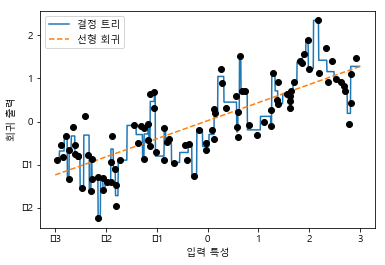

In [87]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

### 4-3 구간 분할(bining)
<pre>
연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 중 하나.
</pre>

In [88]:
bins = np.linspace(-3, 3, 11)   # -3부터 3까지 10개의 구간을 정의
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


<pre> 
각각의 구간의 그 사이의 값을 담는다.
</pre>

In [89]:
which_bin = np.digitize(X, bins=bins)   # X의 각각의 값이 소속된 구간(정수)값 구하기
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])   # -0.75275929는 -1.2~-0.6의 구간이다.


데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


### 소속 구간의 범주형 값으로 변환 후, 이를 OneHotEncoding

In [90]:
from sklearn.preprocessing import OneHotEncoder
# 변환을 위해 OneHotEncoder를 사용합니다
OneHot_encoder = OneHotEncoder(sparse=False)
# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다
OneHot_encoder.fit(which_bin)
# 원-핫-인코딩으로 변환합니다
X_binned = OneHot_encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [91]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


In [92]:
line_binned = OneHot_encoder.transform(np.digitize(line, bins=bins))
print(line_binned)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Text(0.5,0,'입력 특성')

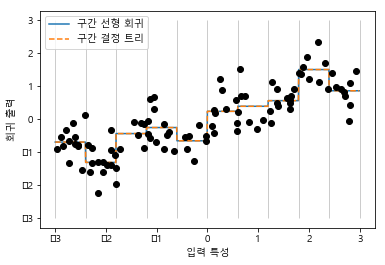

In [93]:
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

### 선형회귀와 결정트리가 같은 예측을 만들어낸다. (겹치다-파선과 실선)
<img src="img/binning.png">

### 4-4 일변량 비선형 변환
<pre>
가. log, exp, sin 같은 수학 함수를 적용하는 것도 feature의 변환에 유용함.
나. 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있다.
    --> 특성과 타깃값 사이의 비선형성을 log, exp 함수를 이용하여 선형 모델과 신경망의 성능을 키운다.
다. 릿지 모델 적용한다.(log하기 전과 후)
</pre>

In [94]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))   # 1000행, 3열의 데이터 만들기
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


([array([829., 120.,  33.,  11.,   5.,   2.,   0.,   0.,   0.,   0.]),
  array([820., 127.,  31.,  13.,   2.,   5.,   0.,   1.,   0.,   1.]),
  array([824., 126.,  32.,  12.,   4.,   1.,   0.,   0.,   1.,   0.])],
 array([  0. ,  24.8,  49.6,  74.4,  99.2, 124. , 148.8, 173.6, 198.4,
        223.2, 248. ]),
 <a list of 3 Lists of Patches objects>)

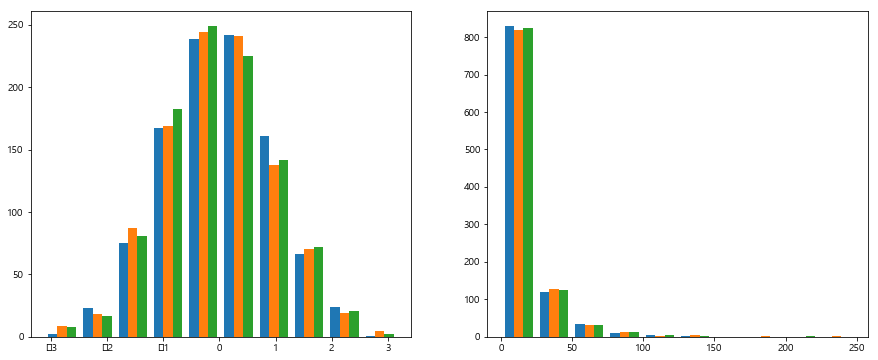

In [95]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(X_org)
ax2.hist(X)

In [96]:
print(np.exp(X_org)[1:3])
print(10 * np.exp(X_org)[1:3])
print(X.shape)
X[1:3]          # poisson 분포

[[9.40172515 6.47247125 0.37633413]
 [2.58593829 0.85954061 0.90192956]]
[[94.01725152 64.72471246  3.76334133]
 [25.85938291  8.59540609  9.01929563]]
(1000, 3)


array([[81, 57,  3],
       [25,  9, 11]])

(1000, 3)
(1000,)
[ 81  25  20  27  18  12  21 109   7  15   1  27   4   1   7   2  11   6
  18]
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'값')

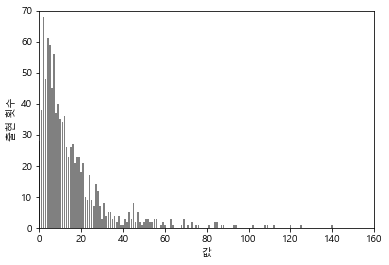

In [97]:
print(X[:,].shape)
print(X[:, 0].shape)   # 3열의 데이터 중에 첫번째 선택
print(X[:, 0][1:20])   # 첫번째 열의 데이터 중에 20개만 보기

### freture의 빈도 구하기 - 0이 28번, 1이 38번, 2가 68번 출현됨.
print(np.bincount(X[:,0]))

### bar graph로 표시
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

### 데이터 릿지 모델 적용

In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


### Ridge는 제대로 모델링을 못함.
### log scale로 변경해 보고 적용해 보기

In [99]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5,0,'값')

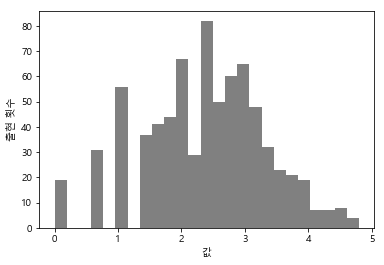

In [100]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")                             

#### 로그 변환 후 X[0] 특성값의 히스토그램

In [101]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


### 다음과 같은 변환은 트리 기반 모델에서는 불필요하다. 하지만 선형 모델에서는 반드시 필수이다.

### 가끔 회귀에서 y를 변환하는 것이 좋을 때도 있다. 
### 주문 횟수를 예측하는 경우, log(y+1)를 사용하면 변환에 도움이 된다.

<img src="img/logTransform.png">

### 정리하면 구간분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 영향을 줄 수 있다.
### 반면에 트리 기반 모델은 스스로 중요한 상호작용을 찾을 수 있고, 대부분의 경우 데이터를 명시적으로 변환하지 않아도 된다.

### 4-5  특성 자동 선택
<pre>
가. 특성이 추가되면 모델은 더 복잡해 지고 과대적합될 가능성도 높아진다.
나. 보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지를 무시해서 줄이는 것이 좋다.
    ===> 그렇다면 어떻게 특성이 좋은지 알 수 있는가?
</pre>

#### 변량 통계(univariate), 모델 기반 선택(model-based selection), 반복적 선택(iterative selection)

### 4-5-1 일변량 통계
<pre>
가. 개개의 feature(특성)와 target(타깃) 사이에 중요한 통계적 관계가 있는지 확인.
    관계가 있는 feature를 선택함. 분류분석(ANOVA-analysis of variance)
나. 다른 feature(특성)과 깊게 연관된 특성은 선택되지 않을 것이다.
다. scikit-learn에서 일변량 분석으로 특성을 선택하려면 
      분류에서는 f_classif(기본값)를 
      회귀에서는 f_regression을 보통 선택 후, 테스트 한다.(p-value에 기초하여 특성을 제외한다.)
라. 높은 p-value를 가진(target과 연관성이 작다) feature(특성)을 제외하도록 임계값을 조정하는 매개변수 사용
     SelectKBest(고정된 k개의 특성선택)
     SelectPercentile(지정된 비율만큼 특성 선택)
</pre>

In [114]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("cancer 형태 : {}".format(cancer.keys()))
# 고정된 난수를 발생
rng = np.random.RandomState(42)
print("데이터 길이 : {}".format(len(cancer.data)))
noise = rng.normal(size=(len(cancer.data), 50))

# 데이터에 노이즈 특성을 추가
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

cancer 형태 : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
데이터 길이 : 569
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


### 어떤 특성이 선택되었을까?

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x1e927136630>],
 <a list of 1 Text yticklabel objects>)

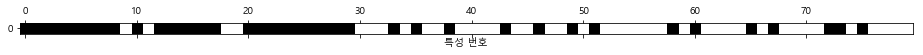

In [115]:
mask = select.get_support()
print(mask)
# True : Black, False : White
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

### 결과를 통해 알수 있듯이 선택된 특성은 원본이고, 노이즈 특성은 거의 모두 제거됨.

In [116]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


### 실습2
### 나의 데이터 셋에 feature engineering 의 내용을 적용시켜보자.
### 정리한 내용을 간단한 ppt 문서 또는 word(notepad++)로 정리해서 올려보자.